LAB Customer Analysis Round 4

In [21]:
# Get the data

import pandas as pd

data = pd.read_csv("marketing_customer_analysis.csv")


In [22]:
data.shape

(9134, 24)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [24]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [25]:
type(data.describe())

pandas.core.frame.DataFrame

In [34]:
#Check the numeric data

data.describe(include=[int])

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


In [35]:
data.describe(include=[float])

,Customer Lifetime Value,Total Claim Amount
count,9134.000000,9134.000000
mean,8004.940475,434.088794
std,6870.967608,290.500092
min,1898.007675,0.099007
25%,3994.251794,272.258244
50%,5780.182197,383.945434
75%,8962.167041,547.514839
max,83325.381190,2893.239678


In [36]:
# Check normality

#https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

#how to apply it to the data that we have?

from numpy.random import seed

from numpy.random import randn

from numpy import mean

from numpy import std

seed(1)

print(mean(data), std(data))

Customer Lifetime Value           8004.940475
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
dtype: float64 Customer Lifetime Value           6870.591478
Income                           30378.241676
Monthly Premium Auto                34.406084
Months Since Last Claim             10.072705
Months Since Policy Inception       27.904463
Number of Open Complaints            0.910334
Number of Policies                   2.390051
Total Claim Amount                 290.484189
dtype: float64


In [41]:
# Check multicollinearity.

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


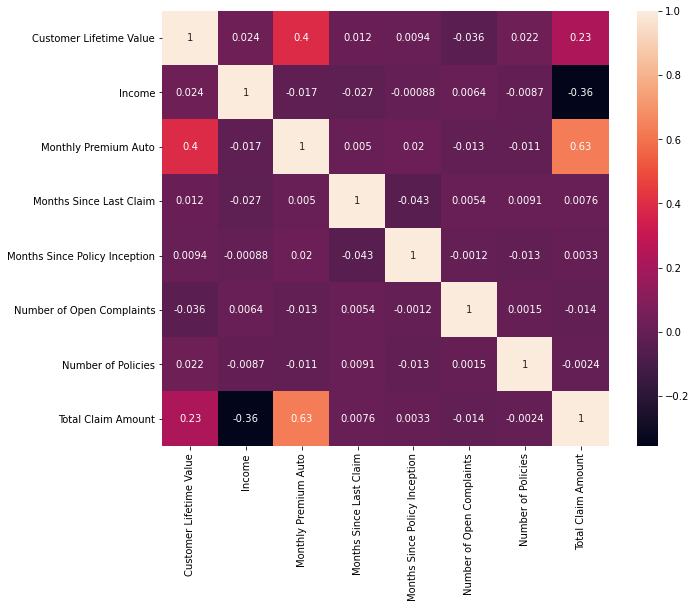

In [42]:


corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.heatmap(corr_matrix, annot=True)

plt.show()

In [44]:
data.corr(method='spearman')



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
Income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
Monthly Premium Auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
Months Since Last Claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
Months Since Policy Inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
Number of Open Complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
Number of Policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
Total Claim Amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


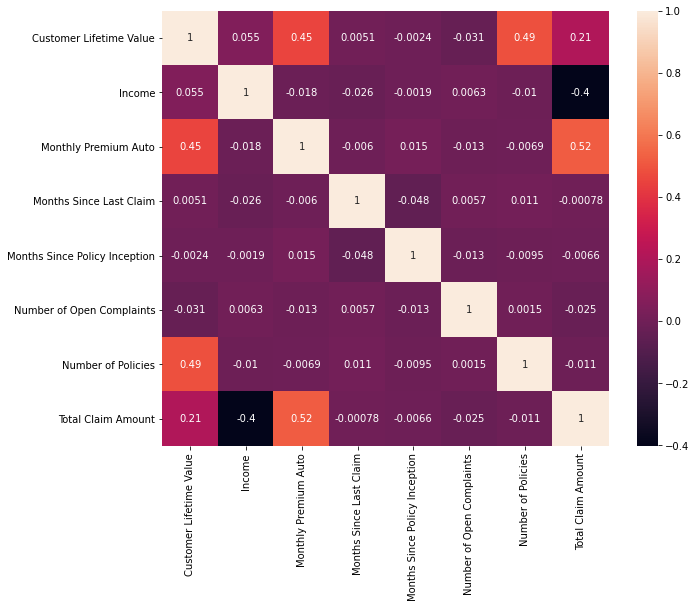

In [45]:
corr_matrix = data.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.heatmap(corr_matrix, annot=True)

plt.show()